#Approximate Inference for Effective Antonym Word Embeddings

Using word embeddings have been a crucial way to avoid high dimensional one hot 
vectors in NLP. Word embeddings, in addition to being a map from the words of a vocabulary $V$ to a space with dimension $d<<|V|$, are able to capture semantic meaning. Two of the most popular methods have been Word2Vec(cite) and GloVe(cite).

However, despite the huge success of word embeddings in being able to provide semanitically powerful representations of words as vectors, the underlying training mechanism in both- Word2Vec and GloVe causes a problem to sweep in. Since both methods use the concept of "context words" i.e. "a word is known by the company it keeps", the word representations of antonyms end up having a very high cosing similarity because they usually occur in very similar contexts. On the other hand, synonyms are often seen to not have a high enough cosine similarity due to an imbalance in the usage of synonyms in text corpora. These characteristics can be seen in the figure below from (cite), which shows the distributions of cosine similarities.

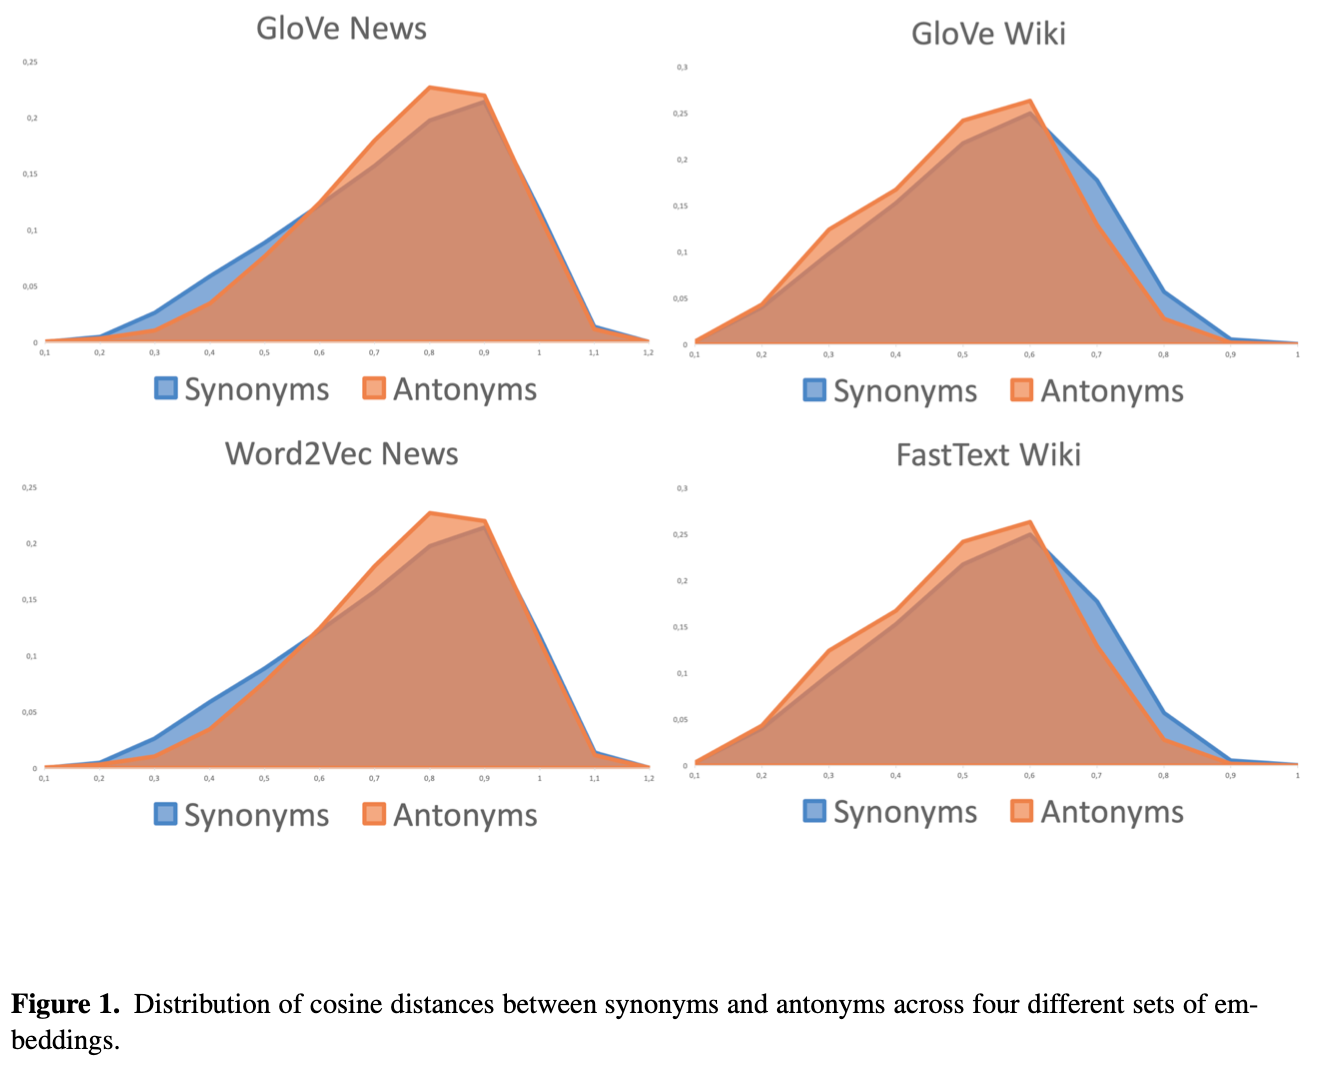

## Objective
Our objective is to find a transformation, which when applied over GloVe embeddings can at least partly alleviate the above while preserving the semantics captured in the original GloVe embeddings. Our original idea was to posit a distribution over the emebedding of each word. However, this makes the number of parameters intractible and hence, we only look for a transformation. To ensure the use of substantial information for each word, while having reasonable number of parameters in the model, we use 100 dimensional  embeddings for 400000 words from Glove. 

##Data

The Lexical Contrast Dataset for Antonym-Synonym Distinction (Nguyen et al., 2016) is used for all our experiments. It contains word pairs with an antonym/synonym tag (0 indicates antonyms and 1 indicates synonyms) associated with each pair. The dataset has 15430 such word pairs, of which 7660 are synonym pairs and 7770 are antonym pairs. 

## Model
Our main focus in Box's loop is over modelling. We iterate through multiple models- the simplest containing merely $d$ parameters and the most complex one containing over $d^2$ parameters.

## Inference
Since the number of parameters are in the order of $d=100$ and even $d^2=10000$, Mean Field Variational Inference is the clear choice over any MCMC/ Gibbs Sampling based methods, the former being much faster and scalable to large datasets such as ours.

## Criticism
1. Performing a simple classification for the pair $(w_i,w_j)$ based on their cosine similarity. That is classify the pair to be synonyms if $cosine\_sim(w_i,w_j)>0$, otherwise classify them as antonyms. Compare accuracy compared to GloVe.
2. Plotting t-sne of new and old embeddings.
3. Drawing cosine distribution over antonym and synonm pairs similar to the figure above.


#Model 1



#Model 2

#Model 3

###Cosine Similarity Distribution - Original glove word embeddings

In the figure below, it can be seen that in the original word embeddings from Glove, the cosine similarities of antonym pairs is quite high and there is a substantial overlap between the cosine similarity distributions of synonym pairs and antonym pairs. This can be attributed to the fact that since antonyms tend to occur in similar contexts, their word representations are also similar.

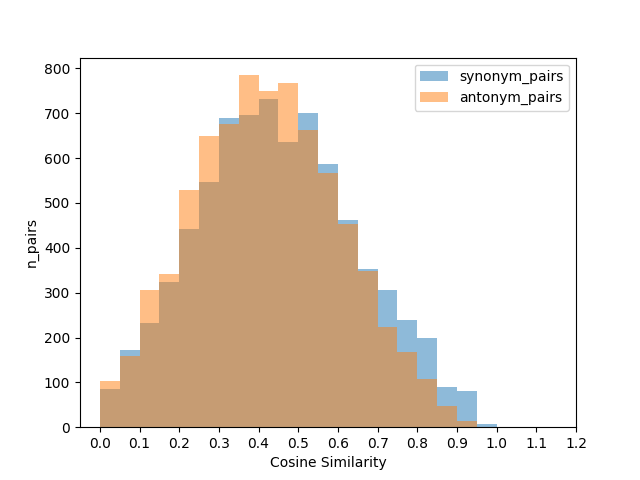

###Cosine Similarity Distribution - Model 1

In the figure below, the cosine similarity distributions for synonym and antonym pairs, with word embeddings transformed using model 1, are shown. In comparison to the original glove distributions, there is a slight leftward shift in the histogram for antonym pairs.

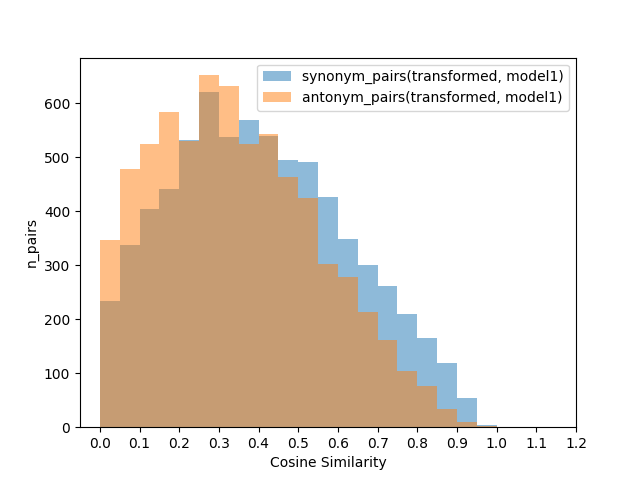

###Cosine Similarity Distribution - Model 2




#### I. Using the antonym transforms for all the pairs

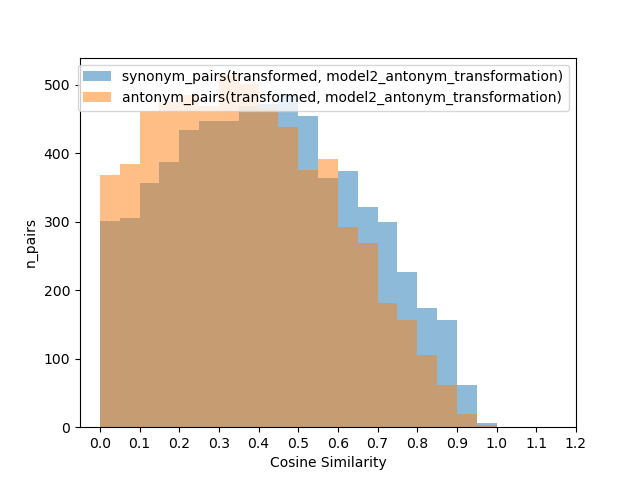

#### II. Using synonym transforms for all pairs

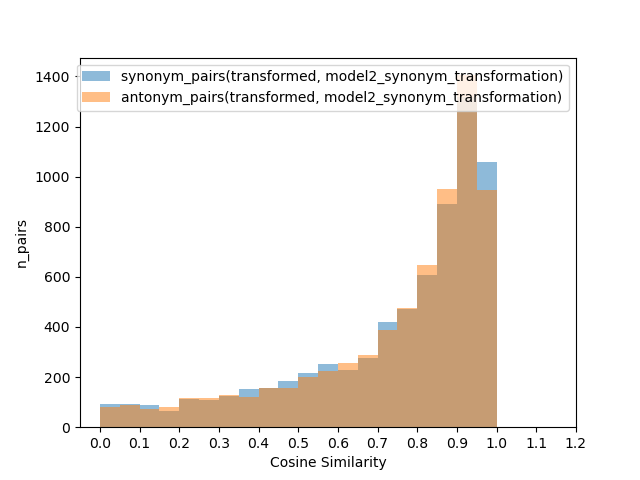

#### III. Using synonym transforms for synonym pairs and antonym transforms for antonym pairs

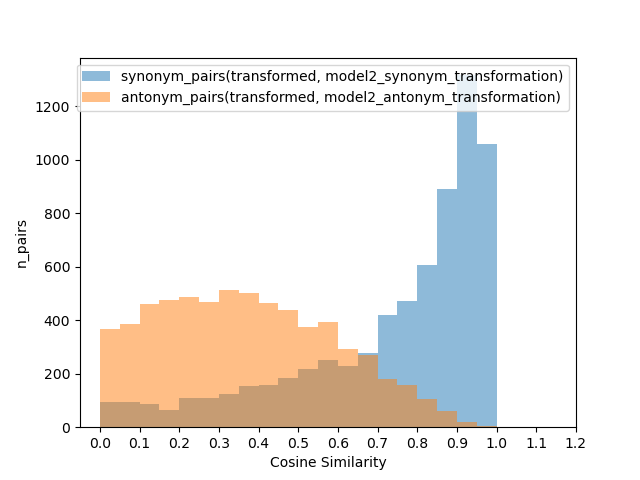

###Cosine Similarity Distribution - Model 3

In the figure below, the cosine similarity distributions for synonym and antonym pairs, with word embeddings transformed using model 3, are shown. In comparison to the original glove distributions and model 1, there is a considerable leftward shift in the histogram for antonym pairs and also a rightward shift in the histogram for synonym pairs. 


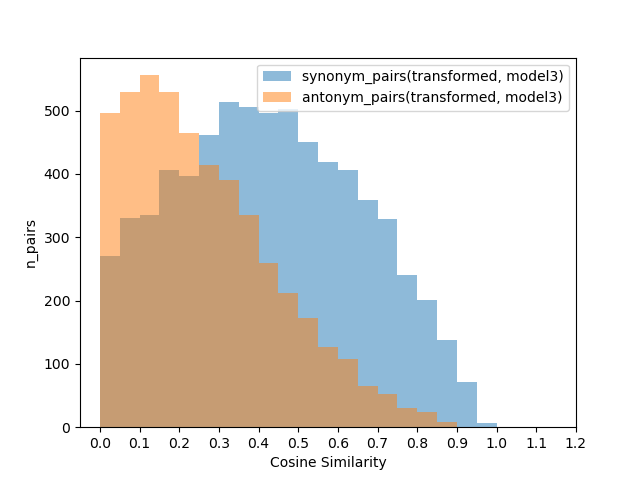

#References
1. Nguyen, K. A., im Walde, S. S., & Vu, N. T. (2016). Integrating Distributional Lexical Contrast into Word Embeddings for Antonym-Synonym Distinction.